In [26]:
%matplotlib inline
import pandas as pd
import urbs
import matplotlib.pyplot as plt

In [3]:
# extract supim timeseries; there's only one solar and one wind,
# so it does not matter which site is picked
data = urbs.read_excel('haag15.xlsx')
supim = data['supim']
ts = supim[[('Alpenstrasse', 'Solar'), ('Umspannwerk', 'Wind')]].drop(0)
ts.columns = ['solar', 'wind']
ts.head()

In [49]:
# resample to daily values
dr = pd.date_range('2001-01-01', periods=8760, freq='1H', name='t')
tsd = ts.resample('1D', how=['min', 'mean', 'median', 'max'])

Helper function for plotting and saving the figure. The `plt.fill_between` trick is taken from the official [pandas plotting documentation](http://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-directly-with-matplotlib)!

In [56]:
def plot_n_savefig_commodity(commodity, colour):
    tsd[(commodity, 'mean')].plot(color=colour)
    plt.fill_between(tsd.index, 
                     tsd[(commodity, 'min')], 
                     tsd[(commodity, 'max')], 
                     color=colour, alpha=0.25)
    plt.savefig('supim-{}-daily.pdf'.format(commodity), bbox_inches='tight', transparent=True)

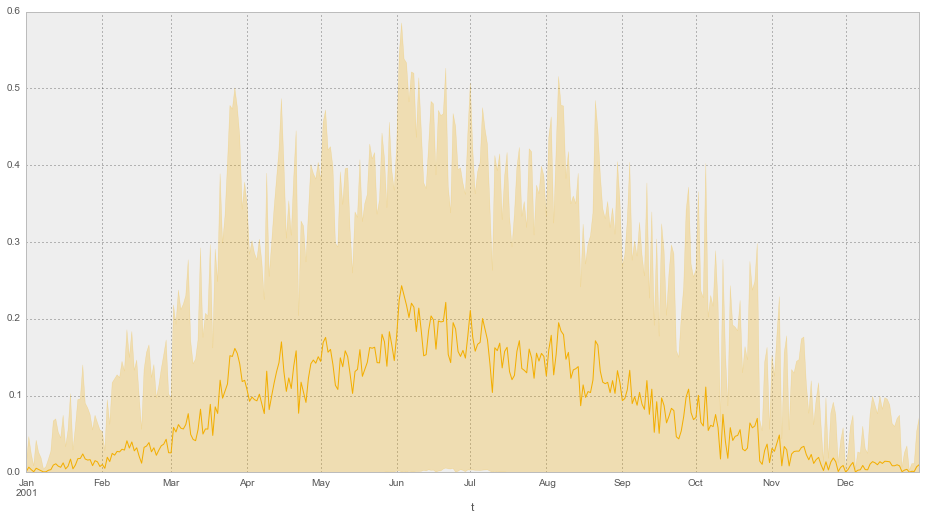

In [54]:
plot_n_savefig_commodity('solar', '#f3ae00')

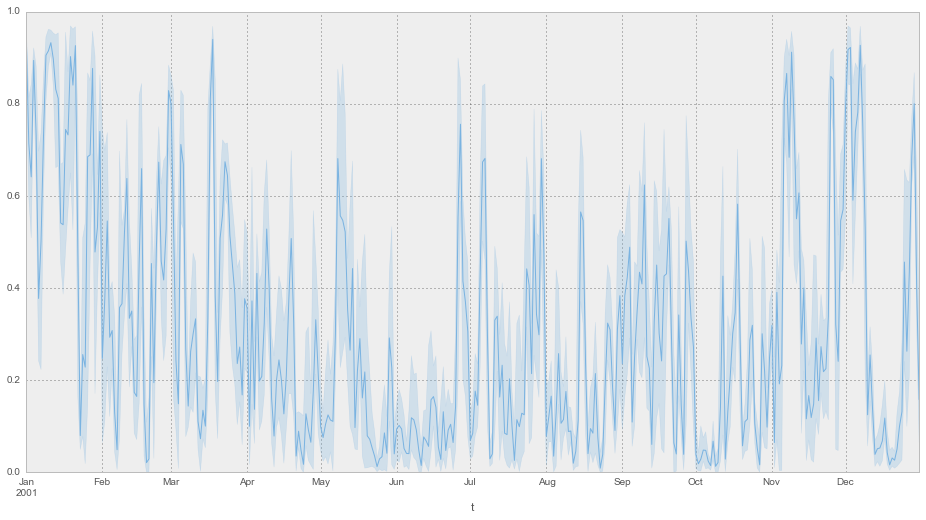

In [55]:
plot_n_savefig_commodity('wind', '#7ab3e1')